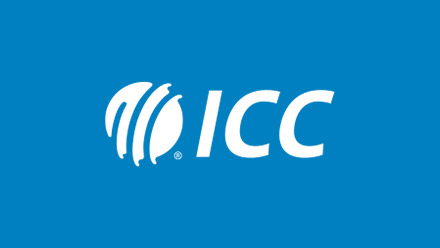

#  ICC Men's T20 Internationals (T20I) Analysis

### Batting Records Data Cleaning

In [1]:
# importing necessary libraries for data cleaning
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('T20I_batting_record.csv')

In [3]:
# Reviewing the data
df.head(5)

,name,span,matches,innings,not_outs,runs,highest_score,average,balls_faced,strike_rate,century,half_century,ducks,fours,sixes
0,V Kohli (IND),2010-2024,117,109,31,4037,122*,51.75,2922,138.15,1,37,5,361,117
1,Babar Azam (PAK),2016-2024,119,112,14,4023,122,41.05,3091,130.15,3,36,6,432,69
2,RG Sharma (IND),2007-2024,151,143,18,3974,121*,31.79,2839,139.97,5,29,12,359,190
3,PR Stirling (IRE),2009-2024,142,141,11,3589,115*,27.60,2650,135.43,1,23,13,417,128
4,MJ Guptill (NZ),2009-2022,122,118,7,3531,105,31.81,2602,135.70,2,20,3,309,173


In [4]:
df.shape

(3822, 15)

In [5]:
# Checking for any null values or any missing data
df.isnull().sum()

name             0
span             0
matches          0
innings          0
not_outs         0
runs             0
highest_score    0
average          0
balls_faced      0
strike_rate      0
century          0
half_century     0
ducks            0
fours            0
sixes            0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3822 entries, 0 to 3821
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           3822 non-null   object
 1   span           3822 non-null   object
 2   matches        3822 non-null   int64 
 3   innings        3822 non-null   object
 4   not_outs       3822 non-null   object
 5   runs           3822 non-null   object
 6   highest_score  3822 non-null   object
 7   average        3822 non-null   object
 8   balls_faced    3822 non-null   object
 9   strike_rate    3822 non-null   object
 10  century        3822 non-null   object
 11  half_century   3822 non-null   object
 12  ducks          3822 non-null   object
 13  fours          3822 non-null   object
 14  sixes          3822 non-null   object
dtypes: int64(1), object(14)
memory usage: 448.0+ KB


In [7]:
# splitting the name such that we have two columns - name and country
df['country'] = df['name'].str.rsplit(' ',n=1).str.get(1)
df['name'] = df['name'].str.rsplit(' ',n=1).str.get(0) 

In [8]:
df.head(5)

,name,span,matches,innings,not_outs,runs,highest_score,average,balls_faced,strike_rate,century,half_century,ducks,fours,sixes,country
0,V Kohli,2010-2024,117,109,31,4037,122*,51.75,2922,138.15,1,37,5,361,117,(IND)
1,Babar Azam,2016-2024,119,112,14,4023,122,41.05,3091,130.15,3,36,6,432,69,(PAK)
2,RG Sharma,2007-2024,151,143,18,3974,121*,31.79,2839,139.97,5,29,12,359,190,(IND)
3,PR Stirling,2009-2024,142,141,11,3589,115*,27.60,2650,135.43,1,23,13,417,128,(IRE)
4,MJ Guptill,2009-2022,122,118,7,3531,105,31.81,2602,135.70,2,20,3,309,173,(NZ)


In [9]:
# Reviewing the country column
df.country

0       (IND)
1       (PAK)
2       (IND)
3       (IRE)
4        (NZ)
        ...  
3817    (PAK)
3818    (AFG)
3819    (Mex)
3820    (AFG)
3821    (MLT)
Name: country, Length: 3822, dtype: object

In [10]:
# Extracting all the text from the paranthesis
df['country'] = df['country'].str.extract(r'\((.*?)\)')

In [11]:
# Creating a list such that every entry separated by '/' is available
a = df['country'].str.split('/')

In [12]:
b = []
for i in a:
    
    if i[-1] != "ICC":  # checking if the last element is not ICC
        b.append(i[-1])
    else:               # the first element is important
         b.append(i[0])

In [13]:
# Converting the list to series
b = pd.Series(b)

In [14]:
# Modifying the country column
df['country']=b

In [15]:
df.head(5)

,name,span,matches,innings,not_outs,runs,highest_score,average,balls_faced,strike_rate,century,half_century,ducks,fours,sixes,country
0,V Kohli,2010-2024,117,109,31,4037,122*,51.75,2922,138.15,1,37,5,361,117,IND
1,Babar Azam,2016-2024,119,112,14,4023,122,41.05,3091,130.15,3,36,6,432,69,PAK
2,RG Sharma,2007-2024,151,143,18,3974,121*,31.79,2839,139.97,5,29,12,359,190,IND
3,PR Stirling,2009-2024,142,141,11,3589,115*,27.60,2650,135.43,1,23,13,417,128,IRE
4,MJ Guptill,2009-2022,122,118,7,3531,105,31.81,2602,135.70,2,20,3,309,173,NZ


In [16]:
# necessary columns to be numeric
num_col = ['matches','innings','not_outs','runs','highest_score','average','balls_faced','strike_rate','century','half_century','ducks','fours','sixes']

In [17]:
# making a copy of dataframe for the cleaning purpose
df2 = df[num_col]

In [18]:
# checkimg the innings column
df2.innings.unique()

array(['109', '112', '143', '141', '118', '85', '103', '107', '87', '108',
       '98', '120', '111', '82', '77', '101', '68', '57', '70', '113',
       '75', '76', '73', '53', '78', '94', '60', '79', '65', '80', '58',
       '67', '91', '64', '66', '62', '56', '55', '83', '50', '54', '93',
       '46', '59', '52', '89', '71', '42', '61', '48', '44', '74', '47',
       '51', '49', '36', '31', '43', '35', '63', '27', '88', '45', '38',
       '33', '41', '32', '34', '30', '39', '29', '40', '37', '25', '21',
       '14', '28', '16', '22', '23', '24', '17', '20', '19', '15', '26',
       '18', '11', '12', '13', '8', '10', '9', '6', '7', '5', '3', '4',
       '2', '1', '-'], dtype=object)

In [19]:
# '-' element cannot be converted into the numeric format, removing all the rows with '-' 
df3 = pd.DataFrame()
for i in df2.columns:
    df3[i]=df2[df2[i]!='-'][i]

In [20]:
# after copying the temporary dataframe some values tend to be missing and we are eliminating those rows
df2 = df3
df2.dropna(inplace=True)

In [21]:
# copying the changes in the original dataframe
df[num_col]=df2

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3822 entries, 0 to 3821
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           3822 non-null   object 
 1   span           3822 non-null   object 
 2   matches        3336 non-null   float64
 3   innings        3336 non-null   object 
 4   not_outs       3336 non-null   object 
 5   runs           3336 non-null   object 
 6   highest_score  3336 non-null   object 
 7   average        3336 non-null   object 
 8   balls_faced    3336 non-null   object 
 9   strike_rate    3336 non-null   object 
 10  century        3336 non-null   object 
 11  half_century   3336 non-null   object 
 12  ducks          3336 non-null   object 
 13  fours          3336 non-null   object 
 14  sixes          3336 non-null   object 
 15  country        3822 non-null   object 
dtypes: float64(1), object(15)
memory usage: 477.9+ KB


In [23]:
df.isnull().sum()

name               0
span               0
matches          486
innings          486
not_outs         486
runs             486
highest_score    486
average          486
balls_faced      486
strike_rate      486
century          486
half_century     486
ducks            486
fours            486
sixes            486
country            0
dtype: int64

In [24]:
df.dropna(inplace=True)

In [25]:
df.innings.unique()

array(['109', '112', '143', '141', '118', '85', '103', '107', '87', '108',
       '98', '120', '111', '82', '77', '101', '68', '57', '70', '113',
       '75', '76', '73', '53', '78', '94', '60', '79', '65', '80', '58',
       '67', '91', '64', '66', '62', '56', '55', '83', '50', '54', '93',
       '46', '59', '52', '89', '71', '42', '61', '48', '44', '74', '47',
       '51', '49', '36', '31', '43', '35', '63', '27', '88', '45', '38',
       '33', '41', '32', '34', '30', '39', '29', '40', '37', '25', '21',
       '14', '28', '16', '22', '23', '24', '17', '20', '19', '15', '26',
       '18', '11', '12', '13', '8', '10', '9', '6', '7', '5', '3', '4',
       '2', '1'], dtype=object)

In [26]:
# checking for highest_score column
df.highest_score.unique()

array(['122*', '122', '121*', '115*', '105', '104*', '172', '100*',
       '101*', '95', '99*', '145*', '91', '84', '75', '83', '100', '116*',
       '64*', '106*', '110*', '117', '123', '89', '118*', '112', '124',
       '126', '87', '96*', '63', '103*', '132', '82', '108', '73', '133*',
       '92', '109*', '66', '94', '81', '79*', '93*', '107*', '56', '89*',
       '101', '75*', '90', '86', '119', '103', '91*', '78', '72*', '88*',
       '105*', '111*', '125*', '124*', '70', '74*', '92*', '54*', '68',
       '62', '81*', '71*', '107', '85*', '94*', '102*', '88', '97*',
       '65*', '66*', '74', '73*', '98*', '61', '79', '77*', '57*', '80',
       '118', '162*', '137', '114', '58*', '72', '96', '69*', '83*', '77',
       '80*', '95*', '84*', '62*', '117*', '99', '71', '110', '48*',
       '90*', '104', '115', '57', '68*', '60', '87*', '60*', '137*',
       '109', '55', '42*', '113', '50', '48', '51', '69', '134*', '67',
       '58', '55*', '85', '76', '52', '86*', '40', '56*', '52*'

In [27]:
# removing the '*' from the hihgest_score
high_score = []
for i in df.highest_score:
    
        if(i[-1]=='*'):
            high_score.append(i[:-1])
        else: 
            high_score.append(i)

In [28]:
df['highest_score']=high_score

In [29]:
df.head()

,name,span,matches,innings,not_outs,runs,highest_score,average,balls_faced,strike_rate,century,half_century,ducks,fours,sixes,country
0,V Kohli,2010-2024,117.0,109,31,4037,122,51.75,2922,138.15,1,37,5,361,117,IND
1,Babar Azam,2016-2024,119.0,112,14,4023,122,41.05,3091,130.15,3,36,6,432,69,PAK
2,RG Sharma,2007-2024,151.0,143,18,3974,121,31.79,2839,139.97,5,29,12,359,190,IND
3,PR Stirling,2009-2024,142.0,141,11,3589,115,27.60,2650,135.43,1,23,13,417,128,IRE
4,MJ Guptill,2009-2022,122.0,118,7,3531,105,31.81,2602,135.70,2,20,3,309,173,NZ


In [30]:
df4 = df[num_col]

In [31]:
# converting to numeric columns

df5 = pd.DataFrame()
for i in df4.columns:
    df5[i]=pd.to_numeric(df4[i])

In [32]:
df[num_col]=df5

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3336 entries, 0 to 3613
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           3336 non-null   object 
 1   span           3336 non-null   object 
 2   matches        3336 non-null   float64
 3   innings        3336 non-null   int64  
 4   not_outs       3336 non-null   int64  
 5   runs           3336 non-null   int64  
 6   highest_score  3336 non-null   int64  
 7   average        3336 non-null   float64
 8   balls_faced    3336 non-null   int64  
 9   strike_rate    3336 non-null   float64
 10  century        3336 non-null   int64  
 11  half_century   3336 non-null   int64  
 12  ducks          3336 non-null   int64  
 13  fours          3336 non-null   int64  
 14  sixes          3336 non-null   int64  
 15  country        3336 non-null   object 
dtypes: float64(3), int64(10), object(3)
memory usage: 443.1+ KB


In [34]:
# exporting the cleaned data to csv format
df.to_csv('T20I_batting_records_clean.csv',index=False)

### Bowling Records Data Cleaning

In [35]:
df2 = pd.read_csv('T20I_bowling_record.csv')

In [36]:
# Reviewing the data
df2.head()

,name,span,matches,innings,overs,maiden_overs,runs_conceded,wickets,best_bowling_figure,average,economy_rate,bowling_strike_rate,four_wickets_haul,five_wickets_haul
0,TG Southee (NZ),2008-2024,123,120,446.5,6,3635,157,5/18,23.15,8.13,17.0,2,2
1,Shakib Al Hasan (BAN),2006-2024,122,120,440.1,3,2987,146,5/20,20.45,6.78,18.0,6,2
2,Rashid Khan (AFG/ICC),2015-2024,85,85,324.2,1,1970,138,5/3,14.27,6.07,14.1,5,2
3,IS Sodhi (NZ),2014-2024,116,111,392.5,0,3142,136,4/28,23.10,7.99,17.3,3,0
4,Mustafizur Rahman (BAN),2015-2024,96,95,342.4,7,2588,120,6/10,21.56,7.55,17.1,3,2


In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3872 entries, 0 to 3871
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 3872 non-null   object
 1   span                 3872 non-null   object
 2   matches              3872 non-null   int64 
 3   innings              3872 non-null   object
 4   overs                3872 non-null   object
 5   maiden_overs         3872 non-null   object
 6   runs_conceded        3872 non-null   object
 7   wickets              3872 non-null   object
 8   best_bowling_figure  3872 non-null   object
 9   average              3872 non-null   object
 10  economy_rate         3872 non-null   object
 11  bowling_strike_rate  3872 non-null   object
 12  four_wickets_haul    3872 non-null   object
 13  five_wickets_haul    3872 non-null   object
dtypes: int64(1), object(13)
memory usage: 423.6+ KB


In [38]:
# Checking for any null values or any missing data
df2.isnull().sum()

name                   0
span                   0
matches                0
innings                0
overs                  0
maiden_overs           0
runs_conceded          0
wickets                0
best_bowling_figure    0
average                0
economy_rate           0
bowling_strike_rate    0
four_wickets_haul      0
five_wickets_haul      0
dtype: int64

In [39]:
# splitting the name such that we have two columns - name and country
df2['country'] = df2['name'].str.rsplit(' ',n=1).str.get(1)
df2['name'] = df2['name'].str.rsplit(' ',n=1).str.get(0) 

In [40]:
df2['country'] = df2['country'].str.extract(r'\((.*?)\)')

In [41]:
# Creating a list such that every entry separated by '/' is available
a = df2['country'].str.split('/')

In [42]:
b = []
for i in a:
    
    if i[-1] != "ICC":  # checking if the last element is not ICC
        b.append(i[-1])
    else:               # the first element is important
         b.append(i[0])

In [43]:
# Modifying the country column
b = pd.Series(b)
df2['country']=b

In [44]:
df2.head()

,name,span,matches,innings,overs,maiden_overs,runs_conceded,wickets,best_bowling_figure,average,economy_rate,bowling_strike_rate,four_wickets_haul,five_wickets_haul,country
0,TG Southee,2008-2024,123,120,446.5,6,3635,157,5/18,23.15,8.13,17.0,2,2,NZ
1,Shakib Al Hasan,2006-2024,122,120,440.1,3,2987,146,5/20,20.45,6.78,18.0,6,2,BAN
2,Rashid Khan,2015-2024,85,85,324.2,1,1970,138,5/3,14.27,6.07,14.1,5,2,AFG
3,IS Sodhi,2014-2024,116,111,392.5,0,3142,136,4/28,23.10,7.99,17.3,3,0,NZ
4,Mustafizur Rahman,2015-2024,96,95,342.4,7,2588,120,6/10,21.56,7.55,17.1,3,2,BAN


In [45]:
df2.country.value_counts()

country
PAK      116
IND      110
SL       106
AUS      103
NZ       101
        ... 
MYAN      13
Peru      13
BRA       13
STHEL     12
SWA        4
Name: count, Length: 103, dtype: int64

In [46]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3872 entries, 0 to 3871
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 3872 non-null   object
 1   span                 3872 non-null   object
 2   matches              3872 non-null   int64 
 3   innings              3872 non-null   object
 4   overs                3872 non-null   object
 5   maiden_overs         3872 non-null   object
 6   runs_conceded        3872 non-null   object
 7   wickets              3872 non-null   object
 8   best_bowling_figure  3872 non-null   object
 9   average              3872 non-null   object
 10  economy_rate         3872 non-null   object
 11  bowling_strike_rate  3872 non-null   object
 12  four_wickets_haul    3872 non-null   object
 13  five_wickets_haul    3872 non-null   object
 14  country              3872 non-null   object
dtypes: int64(1), object(14)
memory usage: 453.9+ KB


In [47]:
df2.innings.unique()

array(['120', '85', '111', '95', '83', '98', '102', '94', '74', '63',
       '82', '89', '52', '97', '79', '66', '73', '113', '68', '86', '60',
       '93', '77', '65', '61', '56', '57', '70', '81', '62', '55', '59',
       '35', '71', '38', '53', '58', '39', '43', '49', '50', '47', '44',
       '42', '45', '51', '64', '75', '37', '54', '34', '40', '30', '67',
       '31', '46', '41', '48', '28', '33', '27', '26', '36', '29', '25',
       '32', '24', '22', '20', '23', '19', '21', '18', '16', '17', '14',
       '15', '10', '13', '12', '11', '9', '8', '7', '6', '5', '4', '3',
       '2', '1', '-'], dtype=object)

In [48]:
df2.innings.value_counts()

innings
-      1200
1       406
2       323
3       243
4       192
       ... 
62        1
113       1
81        1
86        1
68        1
Name: count, Length: 91, dtype: int64

In [49]:
# necessary columns to be numeric
num_col = ['innings','overs','maiden_overs','runs_conceded','wickets','average','economy_rate','bowling_strike_rate','four_wickets_haul','five_wickets_haul']

In [50]:
# reviewing the inninigs column
df2.innings.unique()

array(['120', '85', '111', '95', '83', '98', '102', '94', '74', '63',
       '82', '89', '52', '97', '79', '66', '73', '113', '68', '86', '60',
       '93', '77', '65', '61', '56', '57', '70', '81', '62', '55', '59',
       '35', '71', '38', '53', '58', '39', '43', '49', '50', '47', '44',
       '42', '45', '51', '64', '75', '37', '54', '34', '40', '30', '67',
       '31', '46', '41', '48', '28', '33', '27', '26', '36', '29', '25',
       '32', '24', '22', '20', '23', '19', '21', '18', '16', '17', '14',
       '15', '10', '13', '12', '11', '9', '8', '7', '6', '5', '4', '3',
       '2', '1', '-'], dtype=object)

In [51]:
# making a copy of dataframe for the cleaning purpose
df3 = df2[num_col]

In [52]:
# '-' element cannot be converted into the numeric format, removing all the rows with '-'    : there are 631 entries
df4 = pd.DataFrame()
for i in df3.columns:
    df4[i]=df3[df3[i]!='-'][i]

In [53]:
df3 = df4
df3.dropna(inplace=True)

In [54]:
# copying the changes in the original dataframe
df2[num_col]=df3

In [55]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3872 entries, 0 to 3871
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 3872 non-null   object
 1   span                 3872 non-null   object
 2   matches              3872 non-null   int64 
 3   innings              2276 non-null   object
 4   overs                2276 non-null   object
 5   maiden_overs         2276 non-null   object
 6   runs_conceded        2276 non-null   object
 7   wickets              2276 non-null   object
 8   best_bowling_figure  3872 non-null   object
 9   average              2276 non-null   object
 10  economy_rate         2276 non-null   object
 11  bowling_strike_rate  2276 non-null   object
 12  four_wickets_haul    2276 non-null   object
 13  five_wickets_haul    2276 non-null   object
 14  country              3872 non-null   object
dtypes: int64(1), object(14)
memory usage: 453.9+ KB


In [56]:
df2.dropna(inplace=True)

In [57]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2276 entries, 0 to 2275
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 2276 non-null   object
 1   span                 2276 non-null   object
 2   matches              2276 non-null   int64 
 3   innings              2276 non-null   object
 4   overs                2276 non-null   object
 5   maiden_overs         2276 non-null   object
 6   runs_conceded        2276 non-null   object
 7   wickets              2276 non-null   object
 8   best_bowling_figure  2276 non-null   object
 9   average              2276 non-null   object
 10  economy_rate         2276 non-null   object
 11  bowling_strike_rate  2276 non-null   object
 12  four_wickets_haul    2276 non-null   object
 13  five_wickets_haul    2276 non-null   object
 14  country              2276 non-null   object
dtypes: int64(1), object(14)
memory usage: 284.5+ KB


In [58]:
df4 = df2[num_col]

# converting to numeric columns
df5 = pd.DataFrame()
for i in df4.columns:
    df5[i]=pd.to_numeric(df4[i])

df2[num_col]= df5

In [59]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2276 entries, 0 to 2275
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 2276 non-null   object 
 1   span                 2276 non-null   object 
 2   matches              2276 non-null   int64  
 3   innings              2276 non-null   int64  
 4   overs                2276 non-null   float64
 5   maiden_overs         2276 non-null   int64  
 6   runs_conceded        2276 non-null   int64  
 7   wickets              2276 non-null   int64  
 8   best_bowling_figure  2276 non-null   object 
 9   average              2276 non-null   float64
 10  economy_rate         2276 non-null   float64
 11  bowling_strike_rate  2276 non-null   float64
 12  four_wickets_haul    2276 non-null   int64  
 13  five_wickets_haul    2276 non-null   int64  
 14  country              2276 non-null   object 
dtypes: float64(4), int64(7), object(4)
memory u

In [60]:
# exporting the cleaned data to csv format
df2.to_csv('T20I_bowling_records_clean.csv',index=False)

## Data Analysis (01/01/1990-31/05/2024)

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df.head()

,name,span,matches,innings,not_outs,runs,highest_score,average,balls_faced,strike_rate,century,half_century,ducks,fours,sixes,country
0,V Kohli,2010-2024,117.0,109,31,4037,122,51.75,2922,138.15,1,37,5,361,117,IND
1,Babar Azam,2016-2024,119.0,112,14,4023,122,41.05,3091,130.15,3,36,6,432,69,PAK
2,RG Sharma,2007-2024,151.0,143,18,3974,121,31.79,2839,139.97,5,29,12,359,190,IND
3,PR Stirling,2009-2024,142.0,141,11,3589,115,27.60,2650,135.43,1,23,13,417,128,IRE
4,MJ Guptill,2009-2022,122.0,118,7,3531,105,31.81,2602,135.70,2,20,3,309,173,NZ


In [63]:
runs = df[['name','runs']]

In [64]:
# Top 5 batsman having most runs
runs.sort_values(by='runs',ascending=False)['name'].head(5)

0        V Kohli
1     Babar Azam
2      RG Sharma
3    PR Stirling
4     MJ Guptill
Name: name, dtype: object

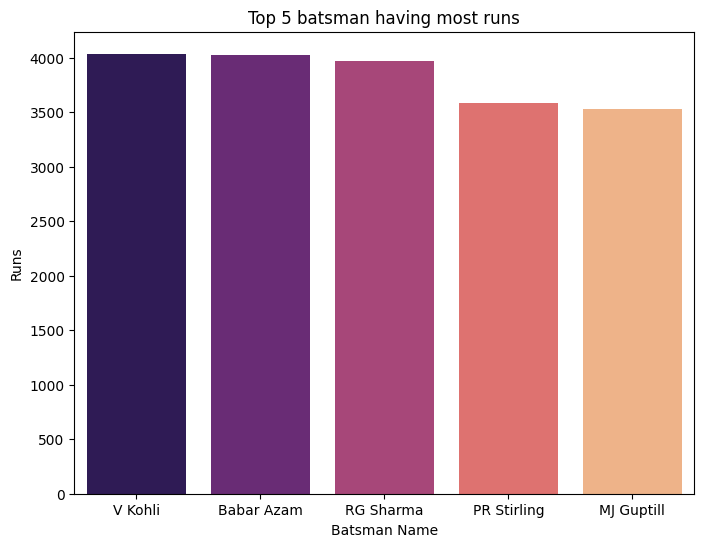

In [65]:
# Visualization plot
plt.figure(figsize=(8, 6))
sns.barplot(x='name', y='runs', data=runs.sort_values(by='runs',ascending=False).head(5), palette="magma")
plt.title('Top 5 batsman having most runs')
plt.xlabel('Batsman Name')
plt.ylabel('Runs')
plt.show()

In [66]:
# Top 20 players having played most number of matches
most_matches = df[df['runs']>1000].sort_values(by='matches',ascending=False).head(20)

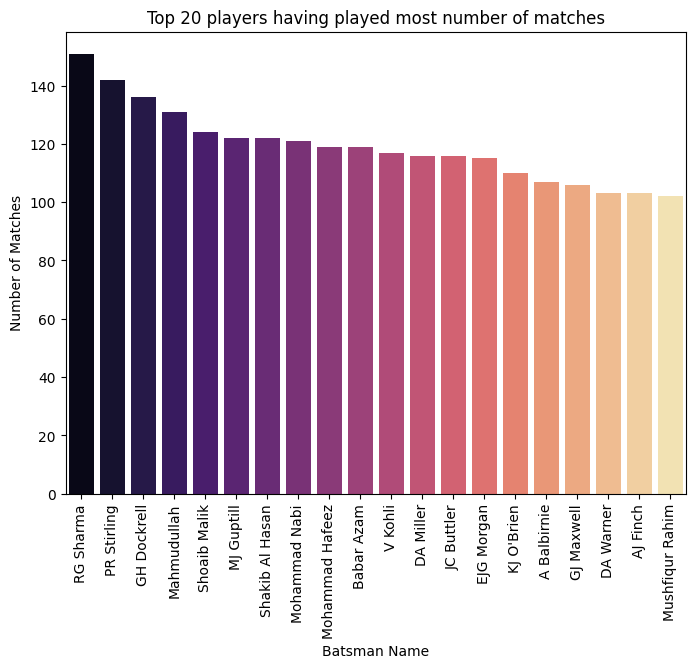

In [67]:
# Visualization plot
plt.figure(figsize=(8, 6))
sns.barplot(x='name', y='matches', data=most_matches, palette="magma")
plt.title('Top 20 players having played most number of matches')
plt.xlabel('Batsman Name')
plt.ylabel('Number of Matches')
plt.xticks(rotation=90)
plt.show()

In [68]:
# Top 10 players with the best average having played atleast 100 matches
best_average = df[df['runs']>1000].sort_values(by='average',ascending=False).head(10)

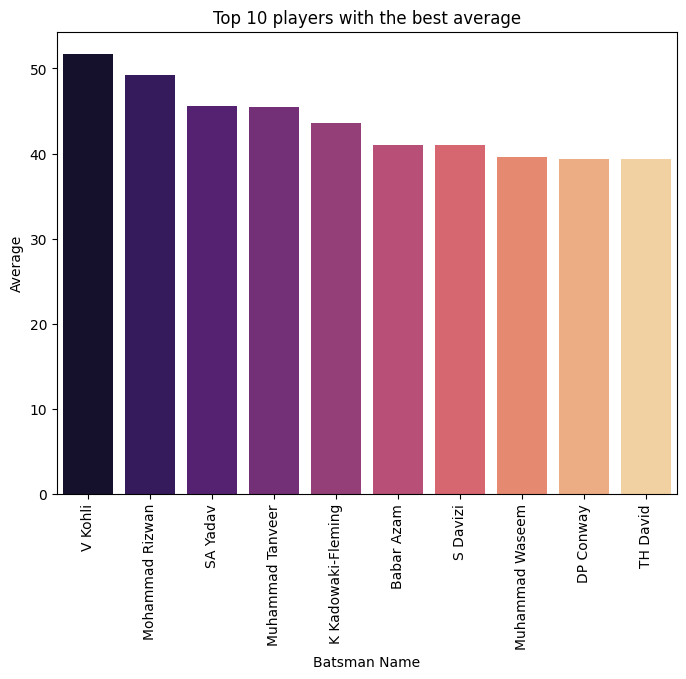

In [69]:
# Visualization plot
plt.figure(figsize=(8, 6))
sns.barplot(x='name', y='average', data=best_average, palette="magma")
plt.title('Top 10 players with the best average')
plt.xlabel('Batsman Name')
plt.ylabel('Average')
plt.xticks(rotation=90)
plt.show()

In [70]:
# Top 20 players with the best strike rate having played atleast 100 matches
best_strike = df[df['runs']>1000].sort_values(by='strike_rate',ascending=False).head(20)

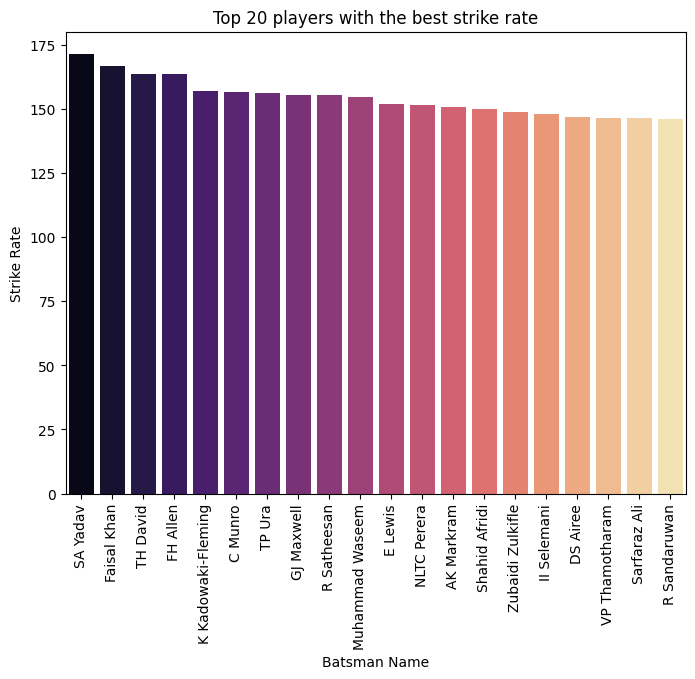

In [71]:
# Visualization plot
plt.figure(figsize=(8, 6))
sns.barplot(x='name', y='strike_rate', data=best_strike, palette="magma")
plt.title('Top 20 players with the best strike rate')
plt.xlabel('Batsman Name')
plt.ylabel('Strike Rate')
plt.xticks(rotation=90)
plt.show()

In [72]:
# Top 15 players with most number of centuries
most_century = df.sort_values(by='century',ascending=False).head(15)

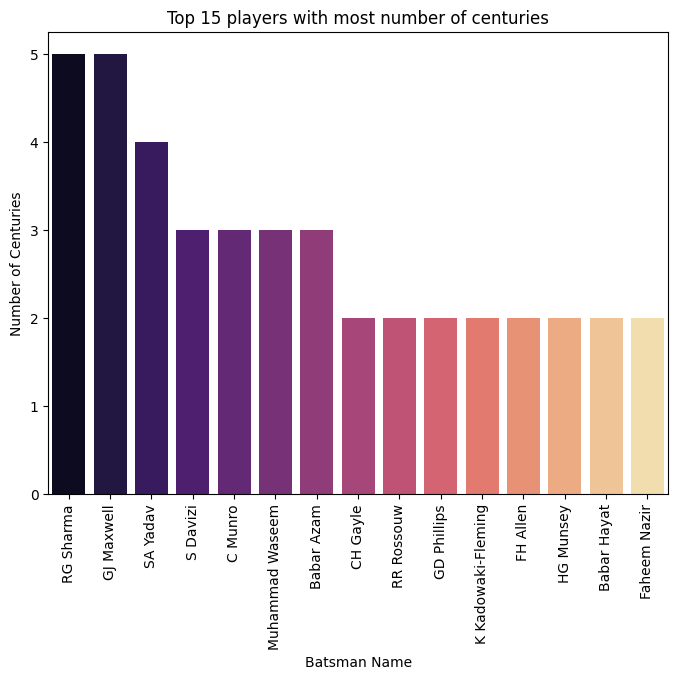

In [73]:
# Visualization plot
plt.figure(figsize=(8, 6))
sns.barplot(x='name', y='century', data = most_century, palette="magma")
plt.title('Top 15 players with most number of centuries')
plt.xlabel('Batsman Name')
plt.ylabel('Number of Centuries')
plt.xticks(rotation=90)
plt.show()

In [74]:
# Top 15 players with most number of half-centuries
half_century = df.sort_values(by='half_century',ascending=False).head(15)

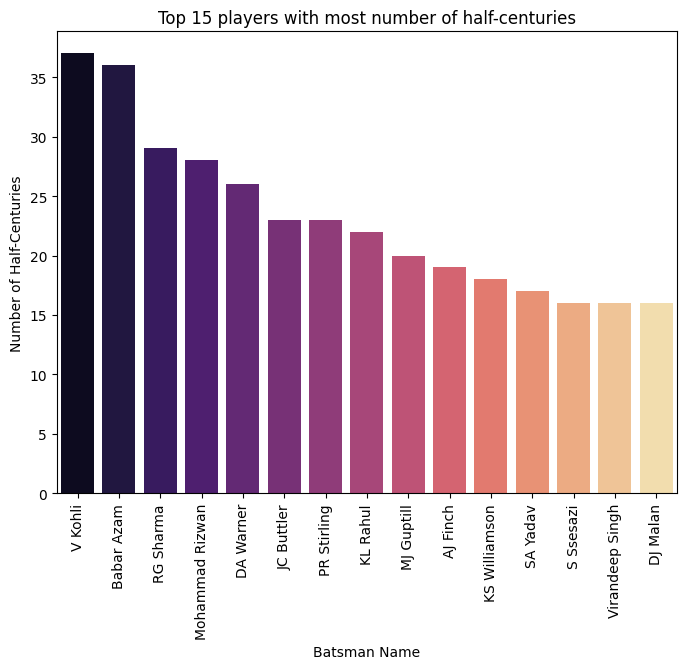

In [75]:
# Visualization plot
plt.figure(figsize=(8, 6))
sns.barplot(x='name', y='half_century', data = half_century, palette="magma")
plt.title('Top 15 players with most number of half-centuries')
plt.xlabel('Batsman Name')
plt.ylabel('Number of Half-Centuries')
plt.xticks(rotation=90)
plt.show()

In [76]:
# Top 10 players with most number of ducks
most_ducks = df[df['runs']>1000].sort_values(by='ducks',ascending=False).head(10)

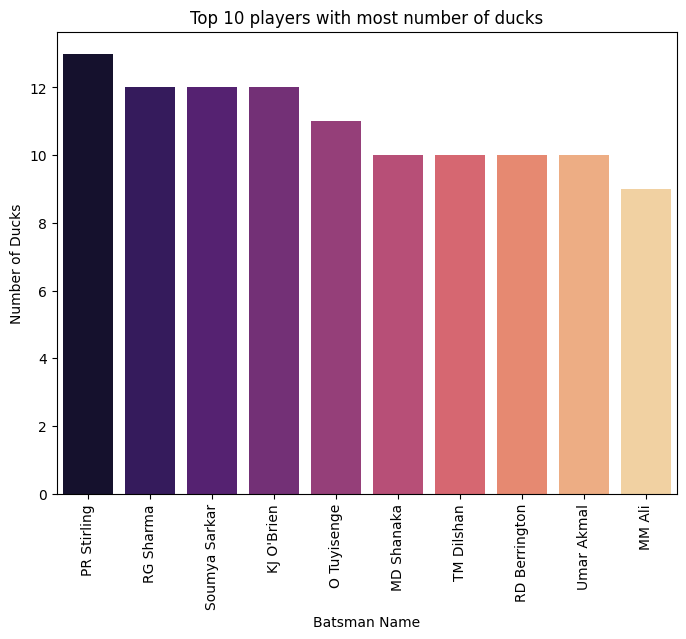

In [77]:
# Visualization plot
plt.figure(figsize=(8, 6))
sns.barplot(x='name', y='ducks', data = most_ducks, palette="magma")
plt.title('Top 10 players with most number of ducks')
plt.xlabel('Batsman Name')
plt.ylabel('Number of Ducks')
plt.xticks(rotation=90)
plt.show()

In [78]:
# Top 5 players with most number of not-outs
most_notouts = df[df['runs']>2000].sort_values(by='not_outs',ascending=False).head(5)

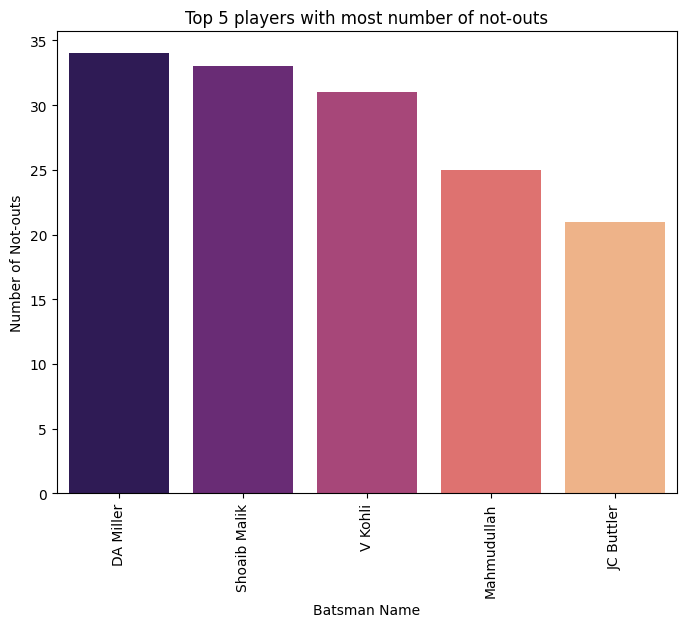

In [79]:
# Visualization plot
plt.figure(figsize=(8, 6))
sns.barplot(x='name', y='not_outs', data = most_notouts, palette="magma")
plt.title('Top 5 players with most number of not-outs')
plt.xlabel('Batsman Name')
plt.ylabel('Number of Not-outs')
plt.xticks(rotation=90)
plt.show()

In [80]:
df2.head()

,name,span,matches,innings,overs,maiden_overs,runs_conceded,wickets,best_bowling_figure,average,economy_rate,bowling_strike_rate,four_wickets_haul,five_wickets_haul,country
0,TG Southee,2008-2024,123,120,446.5,6,3635,157,5/18,23.15,8.13,17.0,2,2,NZ
1,Shakib Al Hasan,2006-2024,122,120,440.1,3,2987,146,5/20,20.45,6.78,18.0,6,2,BAN
2,Rashid Khan,2015-2024,85,85,324.2,1,1970,138,5/3,14.27,6.07,14.1,5,2,AFG
3,IS Sodhi,2014-2024,116,111,392.5,0,3142,136,4/28,23.10,7.99,17.3,3,0,NZ
4,Mustafizur Rahman,2015-2024,96,95,342.4,7,2588,120,6/10,21.56,7.55,17.1,3,2,BAN


In [81]:
# Top 15 bowlers with most number of maiden overs
most_maiden = df2.sort_values(by='maiden_overs',ascending=False).head(15)

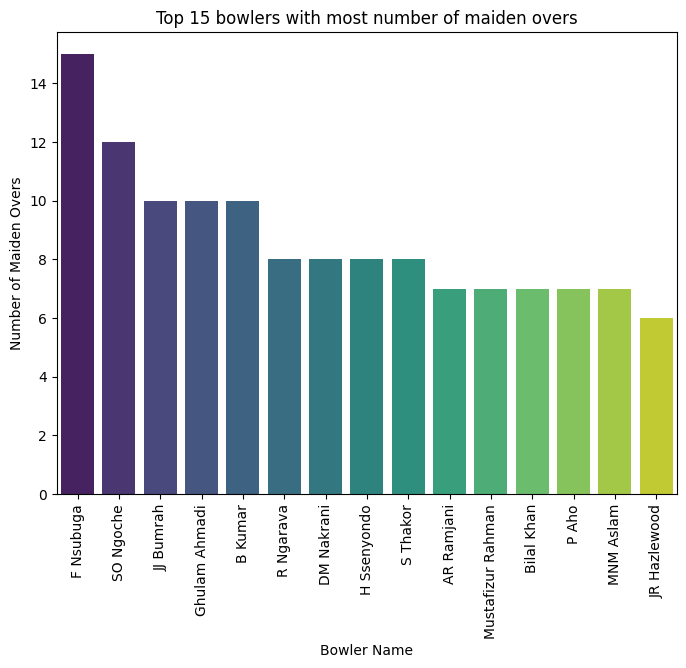

In [82]:
# Visualization plot
plt.figure(figsize=(8, 6))
sns.barplot(x='name', y='maiden_overs', data = most_maiden, palette="viridis")
plt.title('Top 15 bowlers with most number of maiden overs')
plt.xlabel('Bowler Name')
plt.ylabel('Number of Maiden Overs')
plt.xticks(rotation=90)
plt.show()

In [83]:
# Top 20 bowlers with most number of wickets
most_wicket = df2.sort_values(by='wickets',ascending=False).head(20)

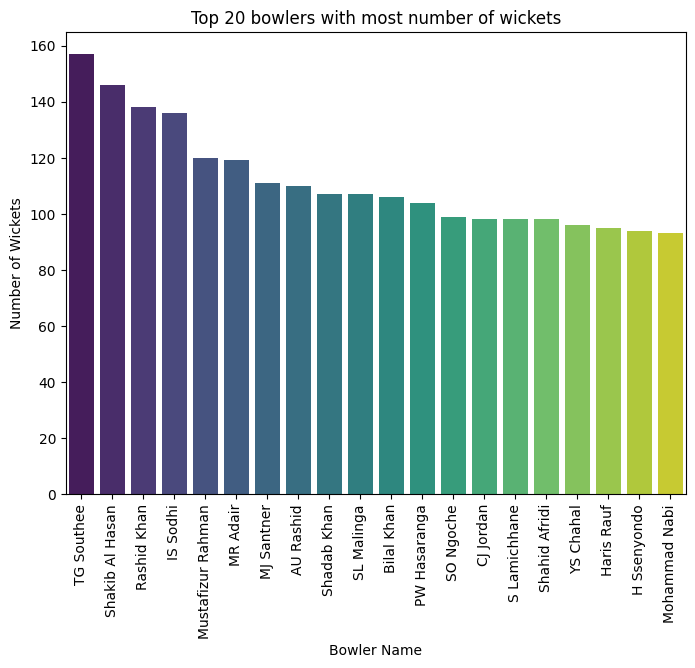

In [84]:
# Visualization plot
plt.figure(figsize=(8, 6))
sns.barplot(x='name', y='wickets', data = most_wicket, palette="viridis")
plt.title('Top 20 bowlers with most number of wickets')
plt.xlabel('Bowler Name')
plt.ylabel('Number of Wickets')
plt.xticks(rotation=90)
plt.show()

In [85]:
# Top 10 bowlers with most number of runs conceded
most_runs_conc = df2.sort_values(by='runs_conceded',ascending=False).head(10)

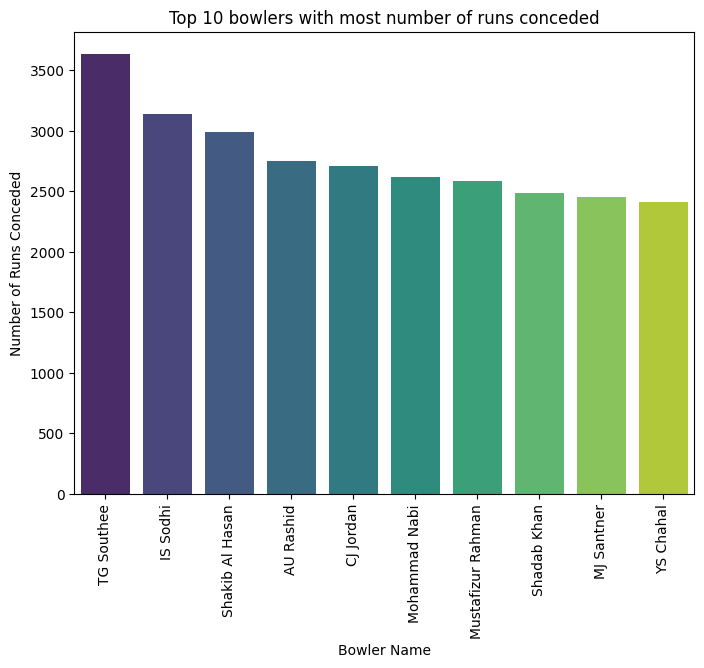

In [86]:
# Visualization plot
plt.figure(figsize=(8, 6))
sns.barplot(x='name', y='runs_conceded', data = most_runs_conc, palette="viridis")
plt.title('Top 10 bowlers with most number of runs conceded')
plt.xlabel('Bowler Name')
plt.ylabel('Number of Runs Conceded')
plt.xticks(rotation=90)
plt.show()

In [87]:
# Top 10 bowlers with the best economy having bowled more than 200 overs
best_eco = df2[df2['overs']>200].sort_values(by='economy_rate',ascending=True).head(10)

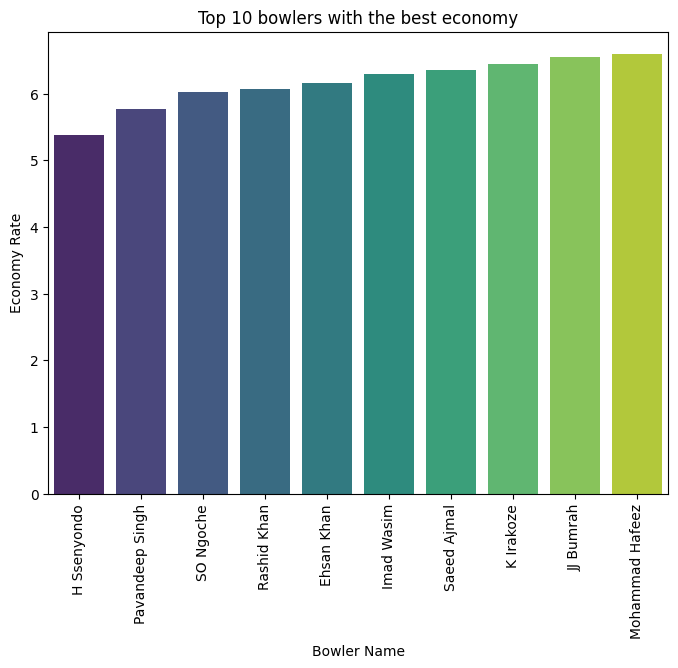

In [88]:
# Visualization plot
plt.figure(figsize=(8, 6))
sns.barplot(x='name', y='economy_rate', data = best_eco, palette="viridis")
plt.title('Top 10 bowlers with the best economy')
plt.xlabel('Bowler Name')
plt.ylabel('Economy Rate')
plt.xticks(rotation=90)
plt.show()

In [89]:
# Top 10 bowlers with the best bowling average having bowled more than 200 overs
best_aver = df2[df2['overs']>200].sort_values(by='average',ascending=True).head(20)

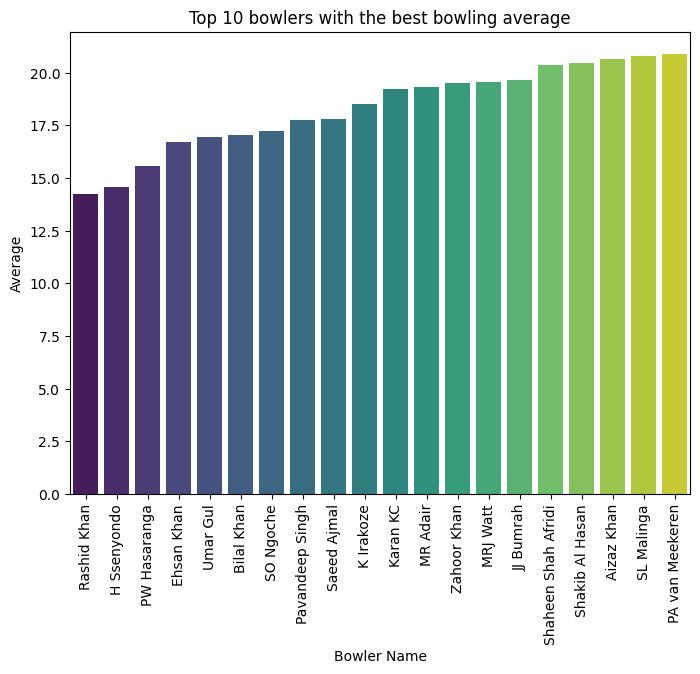

In [90]:
# Visualization plot
plt.figure(figsize=(8, 6))
sns.barplot(x='name', y='average', data = best_aver, palette="viridis")
plt.title('Top 10 bowlers with the best bowling average')
plt.xlabel('Bowler Name')
plt.ylabel('Average')
plt.xticks(rotation=90)
plt.show()

In [91]:
# Top 5 bowlers with most number of five wicket haul
best_haul = df2.sort_values(by='five_wickets_haul',ascending=False).head(5)

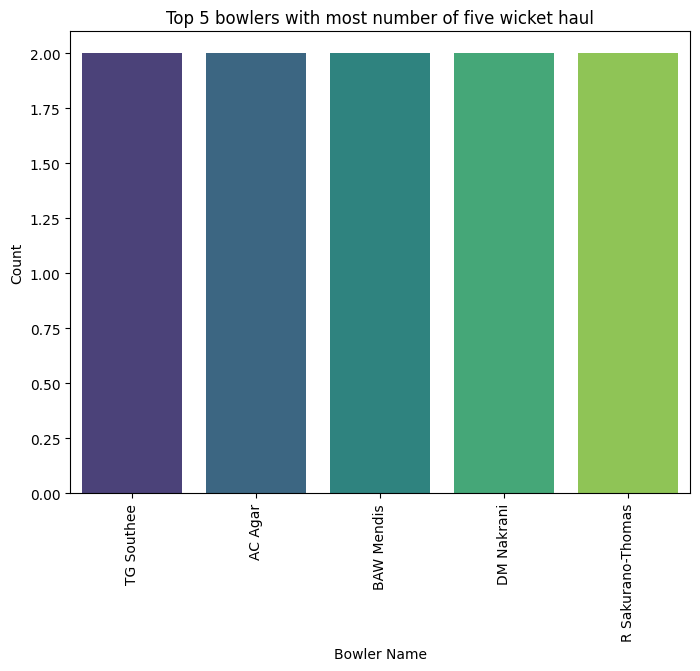

In [92]:
# Visualization plot
plt.figure(figsize=(8, 6))
sns.barplot(x='name', y='five_wickets_haul', data = best_haul, palette="viridis")
plt.title('Top 5 bowlers with most number of five wicket haul')
plt.xlabel('Bowler Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [93]:
# Top 5 bowlers with most number of four wicket haul
best_h = df2.sort_values(by='four_wickets_haul',ascending=False).head(10)

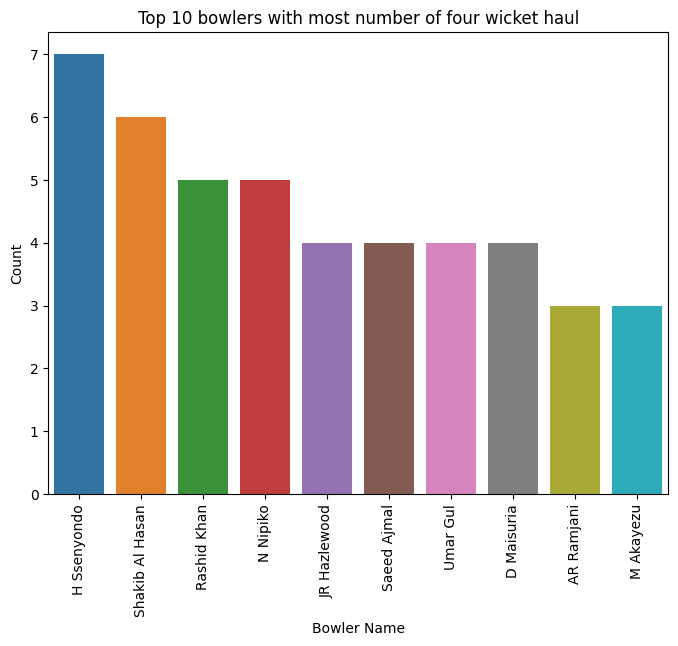

In [94]:
# Visualization plot
plt.figure(figsize=(8, 6))
sns.barplot(x='name', y='four_wickets_haul', data = best_h)
plt.title('Top 10 bowlers with most number of four wicket haul')
plt.xlabel('Bowler Name')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [95]:
# all round performance track
merge_df = pd.merge(df, df2, on='name', how='inner')

In [96]:
all_round = merge_df[(merge_df['runs']>1000) & (merge_df['wickets']>80)]

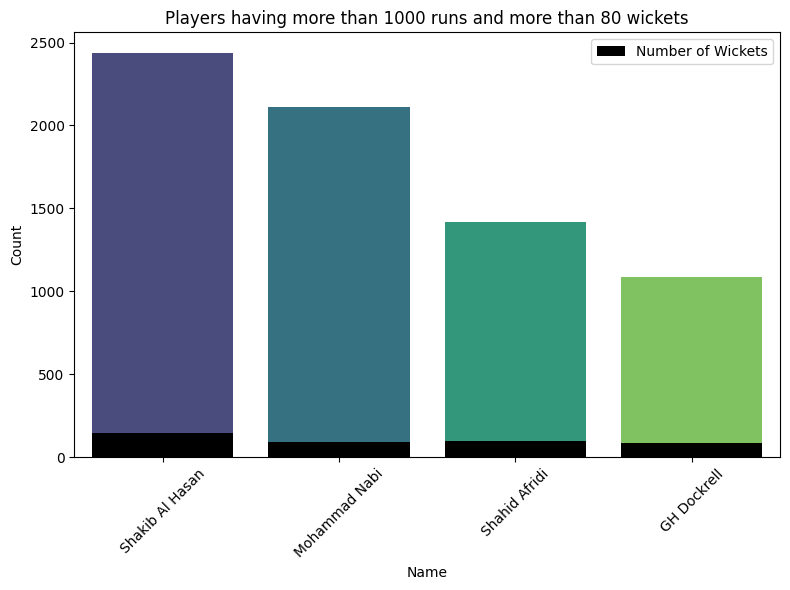

In [97]:
# Visualization plot
fig, ax = plt.subplots(figsize=(8, 6))  # Create a figure and single subplot

# Plot the first bar chart
sns.barplot(x='name', y="runs", data=all_round, ax=ax , palette="viridis")

# Plot the second bar chart on the same subplot with slight right shift
sns.barplot(x="name", y="wickets", data=all_round, ax=ax, label="Number of Wickets", color='black')  # Adjust color as desired

# Adjust x-axis labels to avoid overlapping bars
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add labels and title
plt.xlabel("Name")
plt.ylabel("Count")
plt.title("Players having more than 1000 runs and more than 80 wickets")
plt.legend()  # Show legend for clarity
plt.tight_layout()  # Adjust spacing for readability

plt.show()